## Imports

In [26]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd

## Data Prep

In [27]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K85_Cohort/albumin_cleaned_for_psm_2.csv')

In [28]:
# df.drop(columns=['diuretic'], inplace=True)

In [29]:
df.shape

(217649, 15)

In [30]:
df.albumin_24hrs.value_counts()

0    214490
1      3159
Name: albumin_24hrs, dtype: int64

In [31]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [32]:
df.head()

personid                           encounterid  \
0  0101df2c-9e73-43f3-8a86-3804062428ea  2dc21f88-780f-49ff-8869-9b859454cb25   
1  020382ec-fec4-4cfd-90a8-9648a9908768  b41e918b-0767-41a8-97bd-cebb56dadb92   
2  0fa2e9d4-33c5-4364-9231-18cf81813d46  7c6b5c33-b7a7-4bfd-ad5a-2ccd15a8df50   
3  184ae07b-e2a5-4593-a10c-06f50d579900  e5afc0df-829f-49bb-b0b5-4a13b1aad29d   
4  1b62d11c-7ac4-4c6c-b0e8-7d24e57e3ca3  de68edb3-0e7a-4c40-a81c-8672bcbdd3c3   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    1   2.841667                 0                 0.0                  87   
1    1   3.568958                 0                 1.0                  68   
2    1  13.186944                 1                 0.0                   0   
3    0   7.768056                 0                 1.0                  47   
4    0  18.438889                 0                 1.0                  35   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  LVR  albumin  albumin_24hrs  
0          0    0      1             2.0     1    0        1              1  
1          0    1      3             2.0     5    0        1              1  
2          1    7      1             0.0     1    0        1              0  
3          0    1      0             0.0     0    0        1              0  
4          1    4      0             0.0     0    0        1              0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217649 entries, 0 to 217648
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   personid            217649 non-null  object 
 1   encounterid         217649 non-null  object 
 2   ICU                 217649 non-null  int64  
 3   LOS_days            217649 non-null  float64
 4   90_day_mortality    217649 non-null  int64  
 5   90_day_readmission  217649 non-null  float64
 6   hospital_free_days  217649 non-null  int64  
 7   Cirrhosis           217649 non-null  int64  
 8   CCI                 217649 non-null  int64  
 9   qSOFA               217649 non-null  int64  
 10  albumin_timing      217649 non-null  float64
 11  SEWS                217649 non-null  int64  
 12  LVR                 217649 non-null  int64  
 13  albumin             217649 non-null  int64  
 14  albumin_24hrs       217649 non-null  int64  
dtypes: float64(3), int64(10), object(2

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [34]:
df[df['albumin_24hrs'] == 1].LOS_days.describe()

count    3159.000000
mean       11.544970
std        10.512175
min         0.054167
25%         4.094792
50%         8.156944
75%        15.551962
max        53.249722
Name: LOS_days, dtype: float64

In [35]:
df[df['albumin_24hrs'] == 0].LOS_days.describe()

count    214490.000000
mean          3.666293
std           5.190554
min           0.000000
25%           0.486806
50%           2.273611
75%           4.479861
max          53.372222
Name: LOS_days, dtype: float64

In [36]:
df[df['albumin_24hrs'] == 1]['90_day_mortality'].value_counts()

0    2421
1     738
Name: 90_day_mortality, dtype: int64

In [37]:
df[df['albumin_24hrs'] == 0]['90_day_mortality'].value_counts()

0    209310
1      5180
Name: 90_day_mortality, dtype: int64

In [38]:
df[df['albumin_24hrs'] == 1]['90_day_readmission'].value_counts()

0.0    2197
1.0     962
Name: 90_day_readmission, dtype: int64

In [39]:
df[df['albumin_24hrs'] == 0]['90_day_readmission'].value_counts()

0.0    150403
1.0     64087
Name: 90_day_readmission, dtype: int64

In [40]:
df.head()

personid                           encounterid  \
0  0101df2c-9e73-43f3-8a86-3804062428ea  2dc21f88-780f-49ff-8869-9b859454cb25   
1  020382ec-fec4-4cfd-90a8-9648a9908768  b41e918b-0767-41a8-97bd-cebb56dadb92   
2  0fa2e9d4-33c5-4364-9231-18cf81813d46  7c6b5c33-b7a7-4bfd-ad5a-2ccd15a8df50   
3  184ae07b-e2a5-4593-a10c-06f50d579900  e5afc0df-829f-49bb-b0b5-4a13b1aad29d   
4  1b62d11c-7ac4-4c6c-b0e8-7d24e57e3ca3  de68edb3-0e7a-4c40-a81c-8672bcbdd3c3   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    1   2.841667                 0                 0.0                  87   
1    1   3.568958                 0                 1.0                  68   
2    1  13.186944                 1                 0.0                   0   
3    0   7.768056                 0                 1.0                  47   
4    0  18.438889                 0                 1.0                  35   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  LVR  albumin  albumin_24hrs  
0          0    0      1             2.0     1    0        1              1  
1          0    1      3             2.0     5    0        1              1  
2          1    7      1             0.0     1    0        1              0  
3          0    1      0             0.0     0    0        1              0  
4          1    4      0             0.0     0    0        1              0

In [41]:
# df.drop(columns=['90_day_mortality'], inplace=True)

In [42]:
df.head()

personid                           encounterid  \
0  0101df2c-9e73-43f3-8a86-3804062428ea  2dc21f88-780f-49ff-8869-9b859454cb25   
1  020382ec-fec4-4cfd-90a8-9648a9908768  b41e918b-0767-41a8-97bd-cebb56dadb92   
2  0fa2e9d4-33c5-4364-9231-18cf81813d46  7c6b5c33-b7a7-4bfd-ad5a-2ccd15a8df50   
3  184ae07b-e2a5-4593-a10c-06f50d579900  e5afc0df-829f-49bb-b0b5-4a13b1aad29d   
4  1b62d11c-7ac4-4c6c-b0e8-7d24e57e3ca3  de68edb3-0e7a-4c40-a81c-8672bcbdd3c3   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    1   2.841667                 0                 0.0                  87   
1    1   3.568958                 0                 1.0                  68   
2    1  13.186944                 1                 0.0                   0   
3    0   7.768056                 0                 1.0                  47   
4    0  18.438889                 0                 1.0                  35   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  LVR  albumin  albumin_24hrs  
0          0    0      1             2.0     1    0        1              1  
1          0    1      3             2.0     5    0        1              1  
2          1    7      1             0.0     1    0        1              0  
3          0    1      0             0.0     0    0        1              0  
4          1    4      0             0.0     0    0        1              0

In [43]:
df_a24 = df[['personid', 'encounterid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'albumin_timing', 'albumin']]

In [44]:
df_a24.head()

personid                           encounterid  \
0  0101df2c-9e73-43f3-8a86-3804062428ea  2dc21f88-780f-49ff-8869-9b859454cb25   
1  020382ec-fec4-4cfd-90a8-9648a9908768  b41e918b-0767-41a8-97bd-cebb56dadb92   
2  0fa2e9d4-33c5-4364-9231-18cf81813d46  7c6b5c33-b7a7-4bfd-ad5a-2ccd15a8df50   
3  184ae07b-e2a5-4593-a10c-06f50d579900  e5afc0df-829f-49bb-b0b5-4a13b1aad29d   
4  1b62d11c-7ac4-4c6c-b0e8-7d24e57e3ca3  de68edb3-0e7a-4c40-a81c-8672bcbdd3c3   

    LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0   2.841667                 0                 0.0                  87   
1   3.568958                 0                 1.0                  68   
2  13.186944                 1                 0.0                   0   
3   7.768056                 0                 1.0                  47   
4  18.438889                 0                 1.0                  35   

   albumin_timing  albumin  
0             2.0        1  
1             2.0        1  
2             0.0        1  
3             0.0        1  
4             0.0        1

In [45]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [46]:
df.shape

(217649, 15)

In [47]:
df.head()

personid                           encounterid  \
0  0101df2c-9e73-43f3-8a86-3804062428ea  2dc21f88-780f-49ff-8869-9b859454cb25   
1  020382ec-fec4-4cfd-90a8-9648a9908768  b41e918b-0767-41a8-97bd-cebb56dadb92   
2  0fa2e9d4-33c5-4364-9231-18cf81813d46  7c6b5c33-b7a7-4bfd-ad5a-2ccd15a8df50   
3  184ae07b-e2a5-4593-a10c-06f50d579900  e5afc0df-829f-49bb-b0b5-4a13b1aad29d   
4  1b62d11c-7ac4-4c6c-b0e8-7d24e57e3ca3  de68edb3-0e7a-4c40-a81c-8672bcbdd3c3   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    1   2.841667                 0                 0.0                  87   
1    1   3.568958                 0                 1.0                  68   
2    1  13.186944                 1                 0.0                   0   
3    0   7.768056                 0                 1.0                  47   
4    0  18.438889                 0                 1.0                  35   

   Cirrhosis  CCI  qSOFA  albumin_timing  SEWS  LVR  albumin  albumin_24hrs  
0          0    0      1             2.0     1    0        1              1  
1          0    1      3             2.0     5    0        1              1  
2          1    7      1             0.0     1    0        1              0  
3          0    1      0             0.0     0    0        1              0  
4          1    4      0             0.0     0    0        1              0

## Initialize PsmPy Class

In [48]:
psm = PsmPy(df, treatment= 'albumin_24hrs', indx='encounterid', exclude = ['personid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'albumin_timing', 'albumin'])

In [49]:
%%time
psm.logistic_ps(balance = True)

Wall time: 2min 1s


In [50]:
df_psm = psm.predicted_data

In [51]:
df_psm.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  2dc21f88-780f-49ff-8869-9b859454cb25    1          0    0      1     1   
1  b41e918b-0767-41a8-97bd-cebb56dadb92    1          0    1      3     5   
2  c51a4a13-b8e9-4c35-bc11-c3443f668b06    1          0    0      1     2   
3  92e7d39f-a88c-48af-a64d-d7ad52cd08d0    0          1    4      1     1   
4  d2ea8946-63ac-46fc-b0cc-c41a31f2dda4    0          1    3      1     1   

   LVR  propensity_score  propensity_logit  albumin_24hrs  
0    0          0.710132          0.896024              1  
1    0          0.975129          3.668856              1  
2    0          0.770494          1.211100              1  
3    0          0.886667          2.057142              1  
4    0          0.851459          1.746093              1

## Plot the propensity score / propensity logits

In [52]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 3h 39min 4s


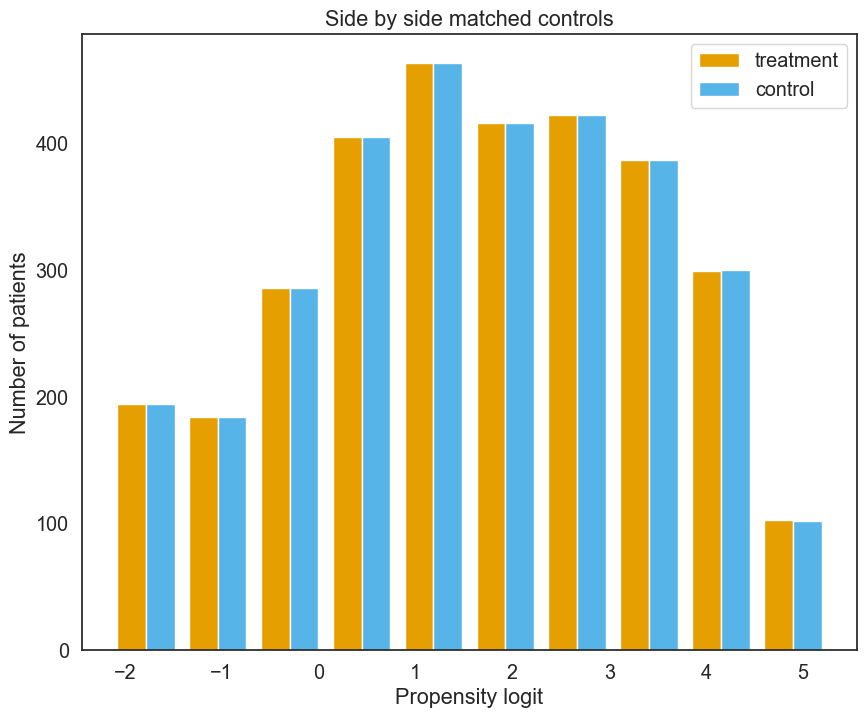

In [53]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

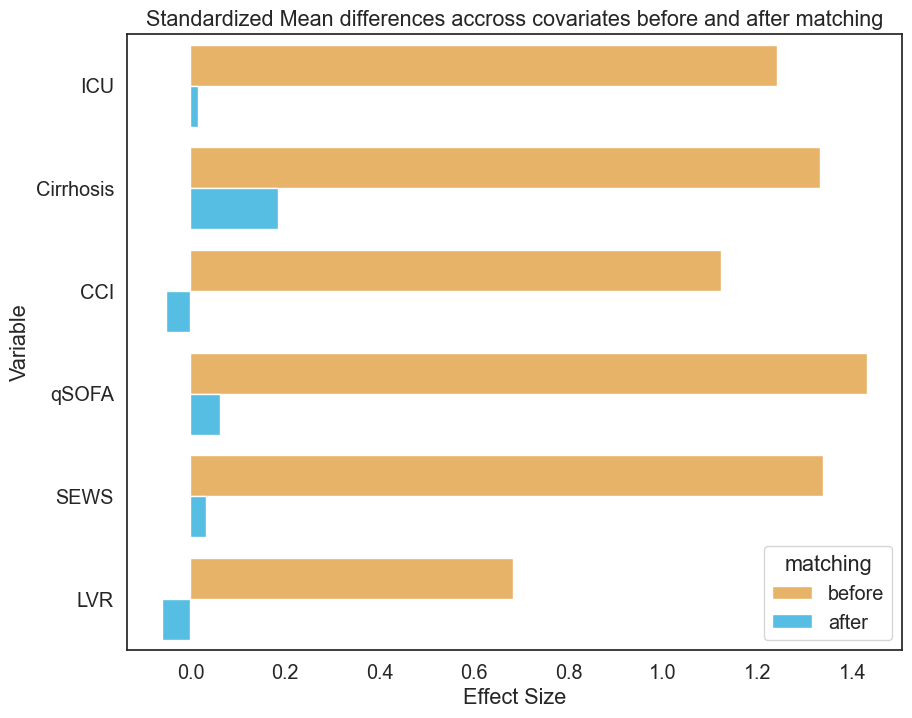

In [54]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [55]:
matched_df = psm.df_matched

In [56]:
matched_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  2dc21f88-780f-49ff-8869-9b859454cb25    1          0    0      1     1   
1  b41e918b-0767-41a8-97bd-cebb56dadb92    1          0    1      3     5   
2  c51a4a13-b8e9-4c35-bc11-c3443f668b06    1          0    0      1     2   
3  92e7d39f-a88c-48af-a64d-d7ad52cd08d0    0          1    4      1     1   
4  d2ea8946-63ac-46fc-b0cc-c41a31f2dda4    0          1    3      1     1   

   LVR  propensity_score  propensity_logit  albumin_24hrs  
0    0          0.710132          0.896024              1  
1    0          0.975129          3.668856              1  
2    0          0.770494          1.211100              1  
3    0          0.886667          2.057142              1  
4    0          0.851459          1.746093              1

In [57]:
matched_df.shape

(6318, 10)

## Matched Ids

In [58]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  2dc21f88-780f-49ff-8869-9b859454cb25  04eb8a65-fe48-488b-8299-01d47bfca430
1  b41e918b-0767-41a8-97bd-cebb56dadb92  b1f24183-e12f-4de8-a77d-b9e7ca6f4fd4
2  c51a4a13-b8e9-4c35-bc11-c3443f668b06  f948ffe5-7cba-439b-9a4b-261fbde76cf8
3  92e7d39f-a88c-48af-a64d-d7ad52cd08d0  5e1ea145-2e66-4243-8109-a3d282bb2407
4  d2ea8946-63ac-46fc-b0cc-c41a31f2dda4  9e5022b7-ca40-4469-80b9-b25aec4928a0

## Effect sizes per variables

In [59]:
psm.effect_size

Variable matching  Effect Size
0         ICU   before     1.239931
1         ICU    after     0.016399
2   Cirrhosis   before     1.331847
3   Cirrhosis    after     0.185912
4         CCI   before     1.122826
5         CCI    after    -0.051399
6       qSOFA   before     1.431179
7       qSOFA    after     0.061823
8        SEWS   before     1.337723
9        SEWS    after     0.033415
10        LVR   before     0.683035
11        LVR    after    -0.059408

## Explore Matched df

In [60]:
matched_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  2dc21f88-780f-49ff-8869-9b859454cb25    1          0    0      1     1   
1  b41e918b-0767-41a8-97bd-cebb56dadb92    1          0    1      3     5   
2  c51a4a13-b8e9-4c35-bc11-c3443f668b06    1          0    0      1     2   
3  92e7d39f-a88c-48af-a64d-d7ad52cd08d0    0          1    4      1     1   
4  d2ea8946-63ac-46fc-b0cc-c41a31f2dda4    0          1    3      1     1   

   LVR  propensity_score  propensity_logit  albumin_24hrs  
0    0          0.710132          0.896024              1  
1    0          0.975129          3.668856              1  
2    0          0.770494          1.211100              1  
3    0          0.886667          2.057142              1  
4    0          0.851459          1.746093              1

In [61]:
matched_df.albumin_24hrs.value_counts()

1    3159
0    3159
Name: albumin_24hrs, dtype: int64

In [62]:
matched_df.shape

(6318, 10)

## Join Matched df with earlier df on encounterid to add outcome variables

In [63]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [64]:
f_df.shape

(6318, 17)

In [65]:
f_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  2dc21f88-780f-49ff-8869-9b859454cb25    1          0    0      1     1   
1  b41e918b-0767-41a8-97bd-cebb56dadb92    1          0    1      3     5   
2  c51a4a13-b8e9-4c35-bc11-c3443f668b06    1          0    0      1     2   
3  92e7d39f-a88c-48af-a64d-d7ad52cd08d0    0          1    4      1     1   
4  d2ea8946-63ac-46fc-b0cc-c41a31f2dda4    0          1    3      1     1   

   LVR  propensity_score  propensity_logit  albumin_24hrs  \
0    0          0.710132          0.896024              1   
1    0          0.975129          3.668856              1   
2    0          0.770494          1.211100              1   
3    0          0.886667          2.057142              1   
4    0          0.851459          1.746093              1   

                               personid   LOS_days  90_day_mortality  \
0  0101df2c-9e73-43f3-8a86-3804062428ea   2.841667                 0   
1  020382ec-fec4-4cfd-90a8-9648a9908768   3.568958                 0   
2  2659d580-6afc-4e49-b02c-cfdb6b417d3a  21.113889                 0   
3  28ca1cb5-ba48-49d2-9ea6-402605244827   6.850556                 0   
4  37dd3925-89b8-4f2f-ba94-ea913e692a00   6.551389                 0   

   90_day_readmission  hospital_free_days  albumin_timing  albumin  
0                 0.0                  87             2.0        1  
1                 1.0                  68             2.0        1  
2                 0.0                  29             1.0        1  
3                 1.0                  12             2.0        1  
4                 0.0                  84             2.0        1

In [67]:
f_df.to_csv('K85_matched_2.csv', index=False)